In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load dataset
df = pd.read_csv("house.csv")  

In [3]:
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
117,5950000,3700,4,1,2,yes,yes,no,no,yes,0,no,furnished
427,3332000,2145,3,1,2,yes,no,yes,no,no,0,yes,furnished
289,4200000,5850,2,1,1,yes,yes,yes,no,no,2,no,semi-furnished
419,3360000,4960,4,1,3,no,no,no,no,no,0,no,semi-furnished
282,4270000,2175,3,1,2,no,yes,yes,no,yes,0,no,unfurnished


In [4]:
df.shape

(545, 13)

In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, explorative=True)
profile.to_file("EDA_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 20.35it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

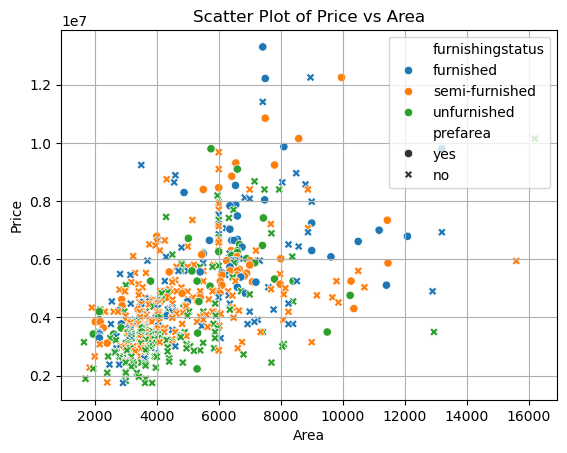

In [8]:
sns.scatterplot(x='area', y='price',hue='furnishingstatus',style='prefarea',data=df)

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Area')
plt.grid(True)
plt.show()

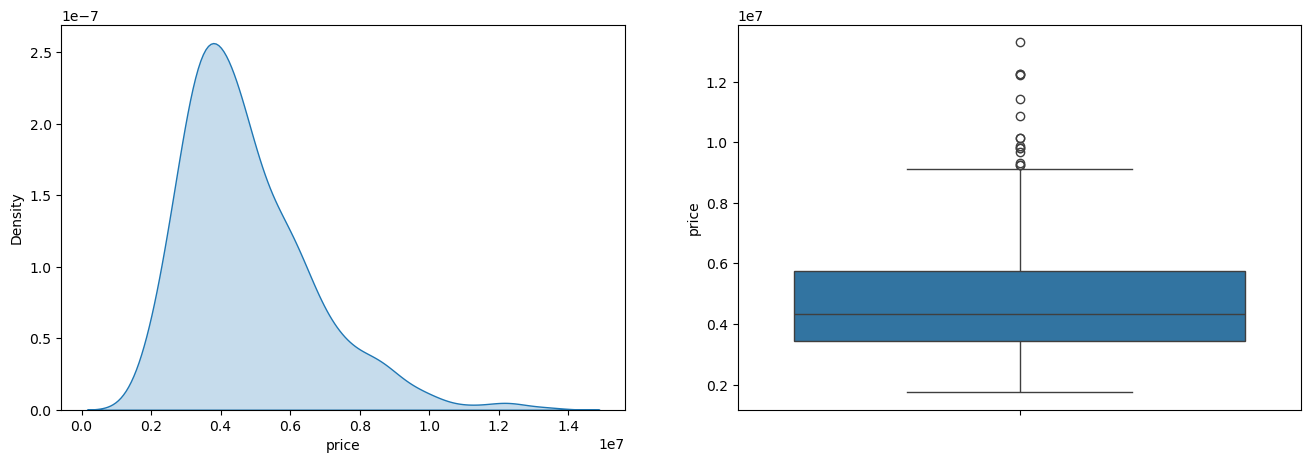

In [9]:
#Price Column
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(x=df['price'], fill=True)

plt.subplot(1,2,2)
sns.boxplot(df['price'])
plt.show()

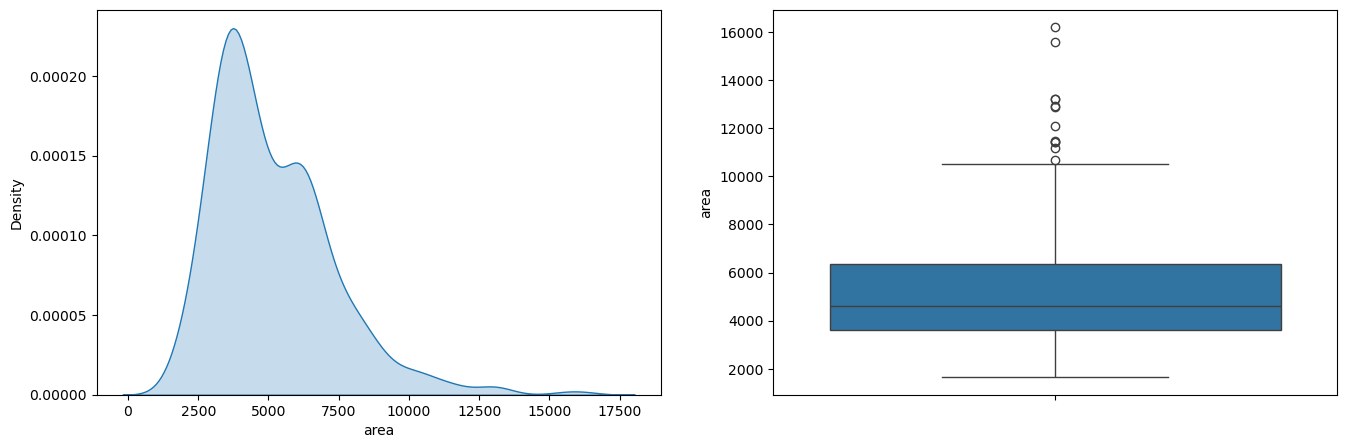

In [10]:
#AREA Column
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(x=df['area'], fill=True)

plt.subplot(1,2,2)
sns.boxplot(df['area'])
plt.show()

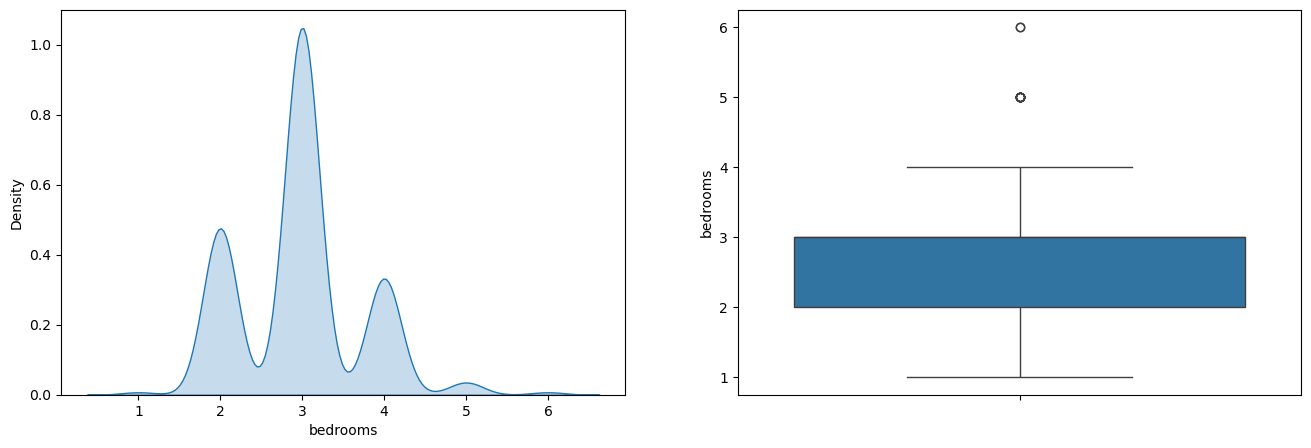

In [11]:
#BEDROOMS Column
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(x=df['bedrooms'], fill=True)

plt.subplot(1,2,2)
sns.boxplot(df['bedrooms'])
plt.show()

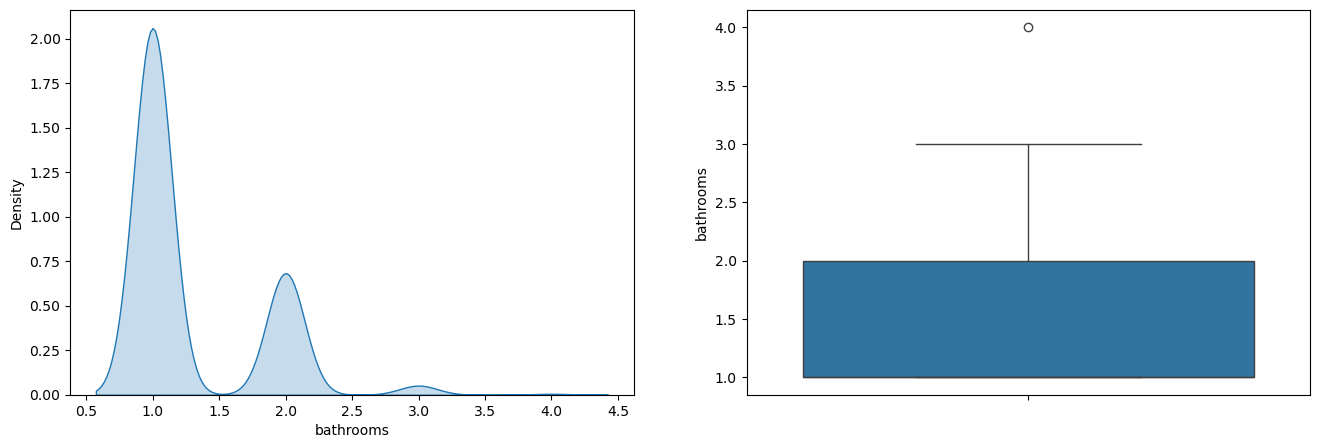

In [12]:
#Bathrooms Column
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(x=df['bathrooms'], fill=True)

plt.subplot(1,2,2)
sns.boxplot(df['bathrooms'])
plt.show()

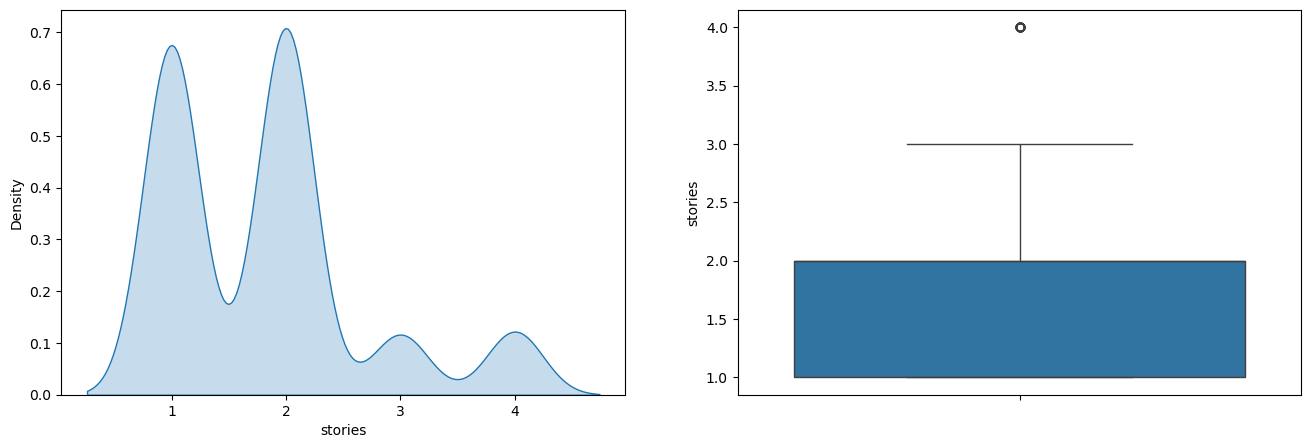

In [13]:
#Stories Column
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(x=df['stories'], fill=True)

plt.subplot(1,2,2)
sns.boxplot(df['stories'])
plt.show()

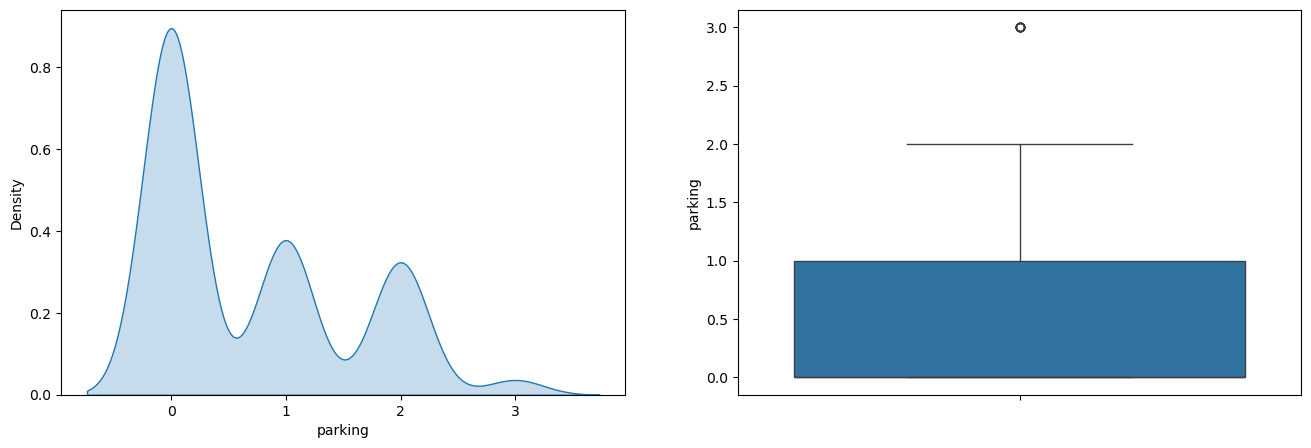

In [14]:
#Parking Column
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(x=df['parking'], fill=True)

plt.subplot(1,2,2)
sns.boxplot(df['parking'])
plt.show()

In [15]:
# Outlier detection and Capping using IQR method
numeric_cols = df.select_dtypes(include=np.number).columns
for i in numeric_cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #CAPPING
    df[i] = np.where(
    df[i]>upper_bound,
    upper_bound,
    np.where(
        df[i]<lower_bound,
        lower_bound,
        df[i]))

In [16]:
df.shape

(545, 13)

In [17]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.727388e+06,5102.249541,2.950459,1.285321,1.767890,0.682569
std,1.745227e+06,2005.804353,0.697504,0.497942,0.777543,0.834773
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,9.205000e+06,10500.000000,4.500000,3.500000,3.500000,2.500000


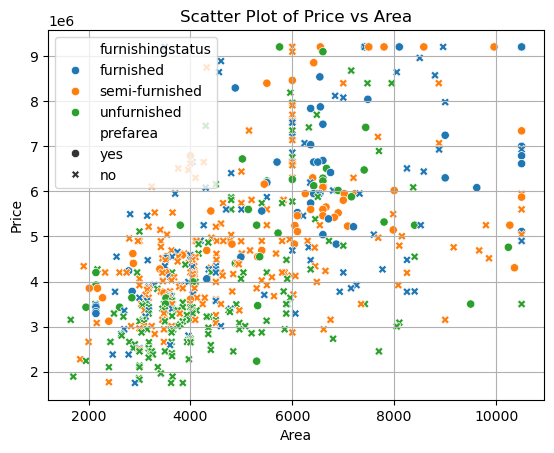

In [18]:
#Scatter Plot After Outlier Detection And Removal
sns.scatterplot(x='area', y='price',hue='furnishingstatus',style='prefarea',data=df)

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Area')
plt.grid(True)
plt.show()

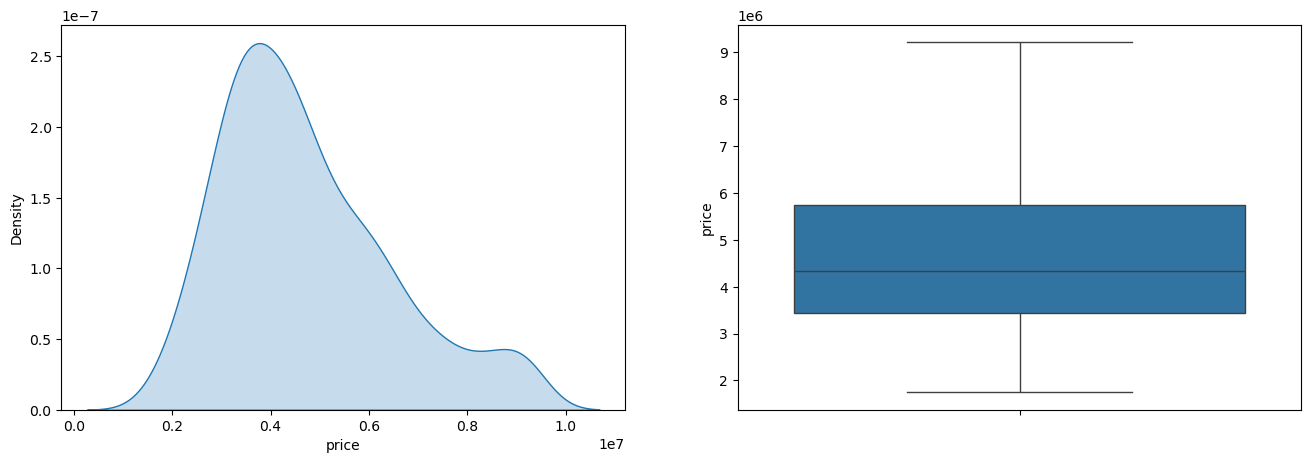

In [19]:
#Price Column After Outlier Detection And Removal
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(x=df['price'], fill=True)

plt.subplot(1,2,2)
sns.boxplot(df['price'])
plt.show()

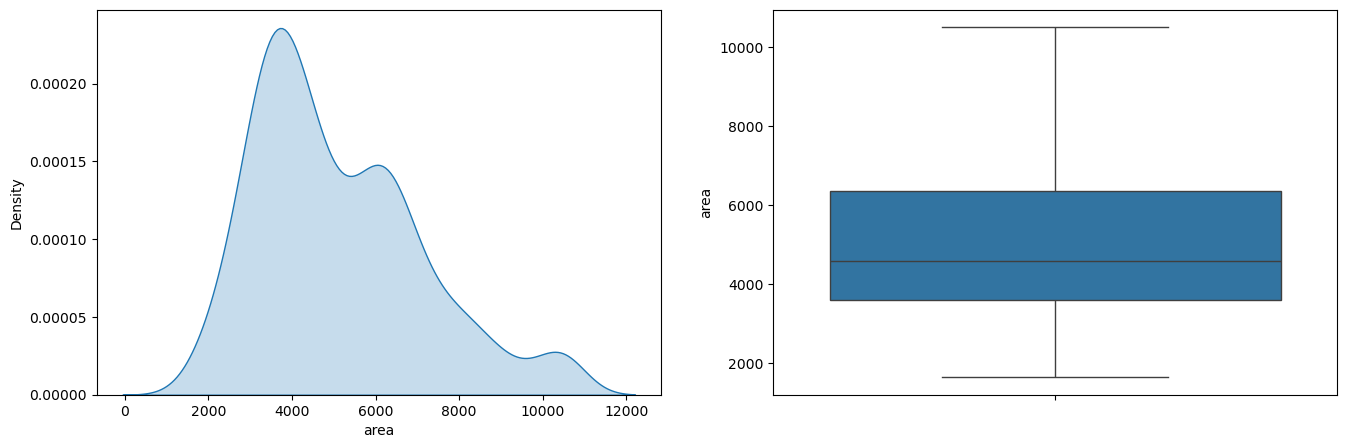

In [20]:
#AREA Column After Outlier Detection And Removal
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(x=df['area'], fill=True)

plt.subplot(1,2,2)
sns.boxplot(df['area'])
plt.show()

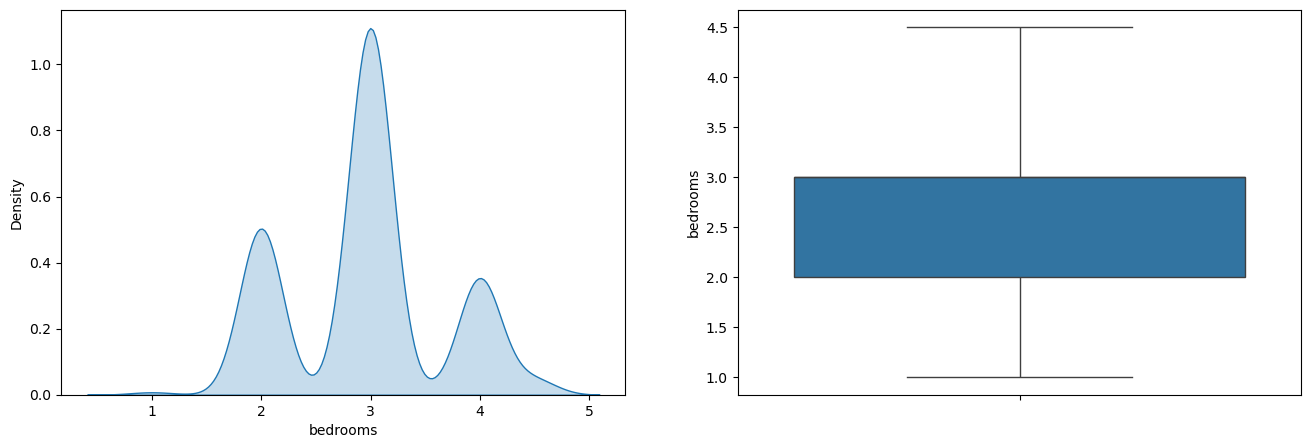

In [21]:
#BEDROOMS Column After Outlier Detection And Removal
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(x=df['bedrooms'], fill=True)

plt.subplot(1,2,2)
sns.boxplot(df['bedrooms'])
plt.show()

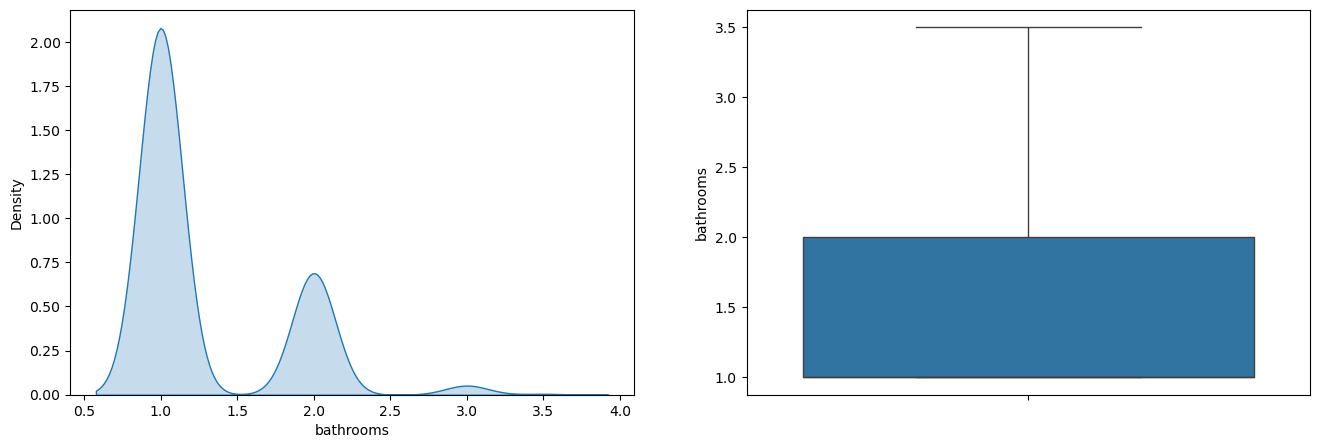

In [22]:
#Bathrooms Column After Outlier Detection And Removal
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(x=df['bathrooms'], fill=True)

plt.subplot(1,2,2)
sns.boxplot(df['bathrooms'])
plt.show()

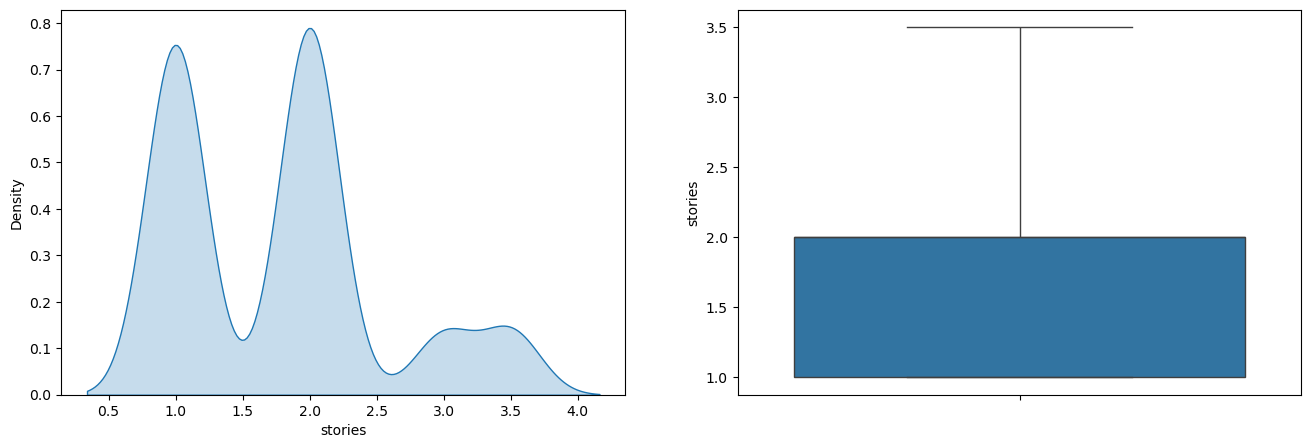

In [23]:
#Stories Column After Outlier Detection And Removal
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(x=df['stories'], fill=True)

plt.subplot(1,2,2)
sns.boxplot(df['stories'])
plt.show()

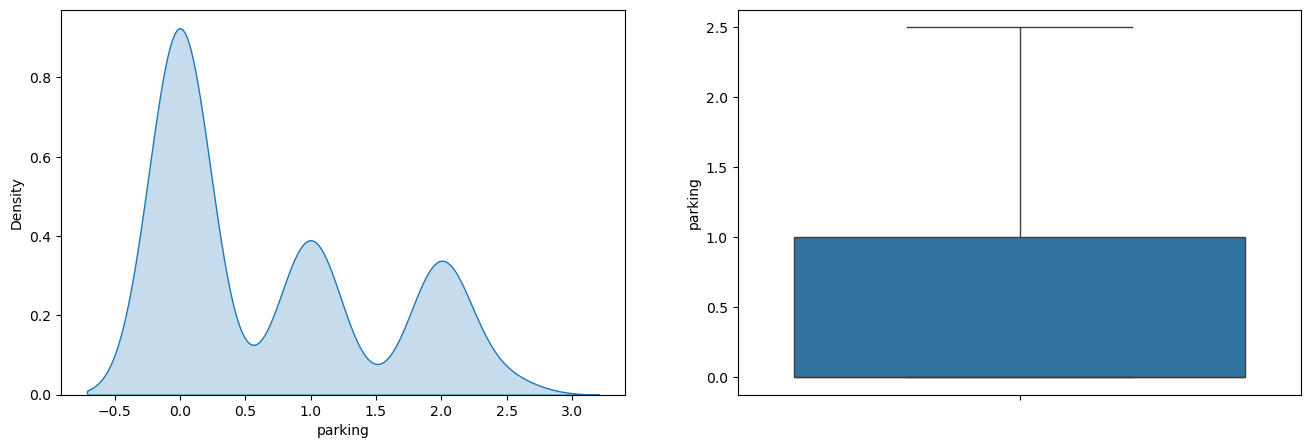

In [24]:
#Parking Column After Outlier Detection And Removal
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(x=df['parking'], fill=True)

plt.subplot(1,2,2)
sns.boxplot(df['parking'])
plt.show()

In [25]:
# Define numerical, ordinal, and nominal columns
numerical_cols = ["area", "bedrooms", "bathrooms", "stories", "parking"]
ordinal_cols = ["furnishingstatus"]  # Ordered categorical column
nominal_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
# Define target variable
target_col = "price"

In [26]:
# Split features and target variable
X = df.drop(columns=[target_col])
y = df[target_col]

In [27]:
# Define order for ordinal encoding
furnishing_order = [["unfurnished", "semi-furnished", "furnished"]]

In [28]:
# Updated ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_cols),
    ("ord", OrdinalEncoder(categories=furnishing_order), ordinal_cols),
    ("nom", OneHotEncoder(drop="first", handle_unknown="ignore"), nominal_cols)
])

In [52]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

In [53]:
# Apply transformations manually
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [54]:
# Train the model
model = LinearRegression()
model.fit(X_train_processed, y_train)

LinearRegression()

In [55]:
# Predictions
y_test_pred = model.predict(X_test_processed)

In [56]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 664715.0072554828
Mean Squared Error: 700489551033.1588
R² Score: 0.7603686926427516


In [57]:
y_test_pred.shape

(109,)

In [58]:
#AABSOLUTE R2 SCORE
ABSR2=1-((1-r2)*(109-1)/(109-1-12))

In [59]:
ABSR2

0.7304147792230956

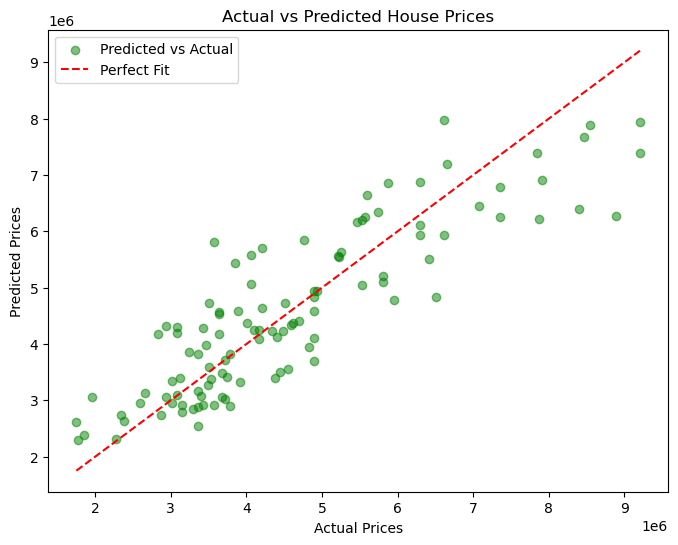

In [60]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()

In [ ]:
def predict_price():
    """
    Takes user input for house features and predicts the price.
    
    Returns:
        float: Predicted price.
    """
    # User input for house features
    area = float(input("Enter area (sq ft): "))
    bedrooms = int(input("Enter number of bedrooms: "))
    bathrooms = int(input("Enter number of bathrooms: "))
    stories = int(input("Enter number of stories: "))
    parking = int(input("Enter number of parking spaces: "))
    
    mainroad = input("Is the house on the main road? (yes/no): ").strip().lower()
    guestroom = input("Does the house have a guestroom? (yes/no): ").strip().lower()
    basement = input("Does the house have a basement? (yes/no): ").strip().lower()
    hotwaterheating = input("Does the house have hot water heating? (yes/no): ").strip().lower()
    airconditioning = input("Does the house have air conditioning? (yes/no): ").strip().lower()
    prefarea = input("Is the house in a preferred area? (yes/no): ").strip().lower()
    
    furnishingstatus = input("Enter furnishing status (unfurnished/semi-furnished/furnished): ").strip().lower()

    # Creating a DataFrame from user input
    input_data = pd.DataFrame([{
        "area": area,
        "bedrooms": bedrooms,
        "bathrooms": bathrooms,
        "stories": stories,
        "parking": parking,
        "mainroad": mainroad,
        "guestroom": guestroom,
        "basement": basement,
        "hotwaterheating": hotwaterheating,
        "airconditioning": airconditioning,
        "prefarea": prefarea,
        "furnishingstatus": furnishingstatus
    }])

    # Apply the same preprocessing transformations
    input_processed = preprocessor.transform(input_data)

    # Predict price
    predicted_price = model.predict(input_processed)[0]
    
    print(f"\nPredicted House Price: {predicted_price:.2f}")

# Call the function to take user input and predict price
predict_price()